# Exploration of alcohol dehydrogenases

In [1]:
from matplotlib.cm import RdBu

In [2]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

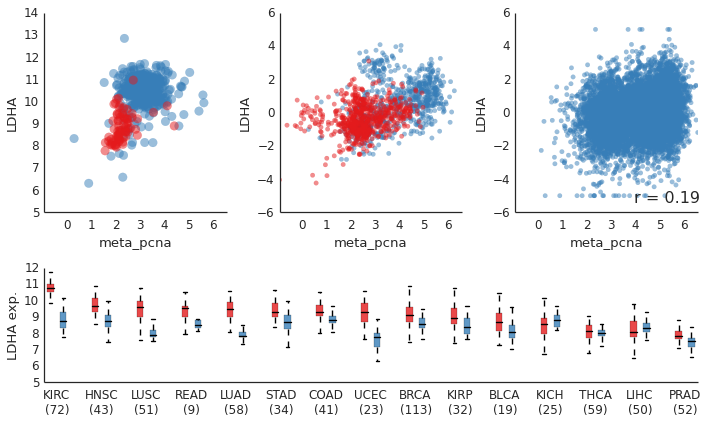

In [9]:
switch_plot('LDHA')

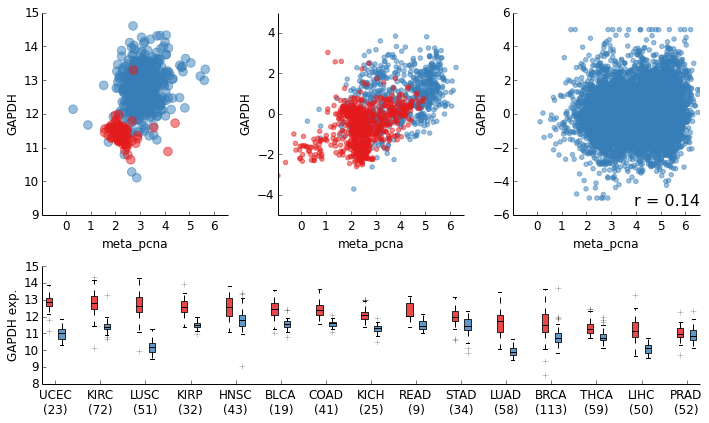

In [134]:
switch_plot('GAPDH')

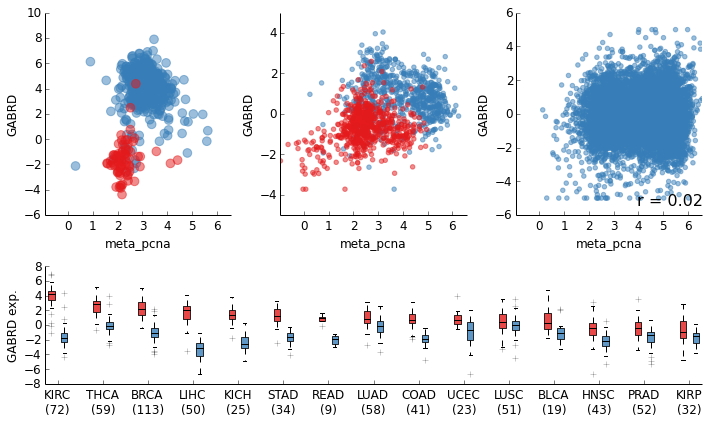

In [176]:
switch_plot('GABRD')

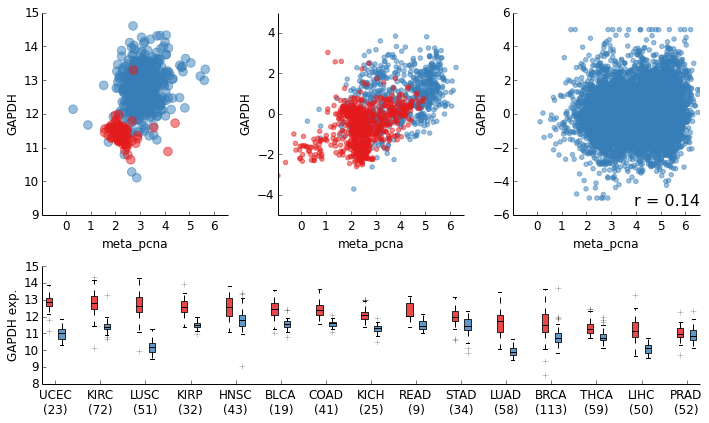

In [122]:
switch_plot('GAPDH')

In [3]:
pk = [g for g in matched_rna.index if g.startswith('ALDO')]
dx_rna.ix[pk]

,num_ox,num_dx,frac,p
ALDOA,540,684,0.79,9.66e-55
ALDOB,202,682,0.30,5.27e-27
ALDOC,317,684,0.46,6.09e-02


In [4]:
ldh = [g for g in matched_rna.index if g.startswith('PDH')]
dx_rna.ix[ldh].sort('p')

,num_ox,num_dx,frac,p
PDHA2,281,407,0.69,1.09e-14
PDHB,289,684,0.42,5.76e-05
PDHX,390,684,0.57,2.75e-04
PDHA1,334,684,0.49,5.66e-01


In [5]:
dx_rna.frac.rank(ascending=False, pct=True).ix['LDHA']

0.034879948085658662

In [6]:
f_win.rank(ascending=False, pct=True).ix['LDHA']

0.0095429160114948765

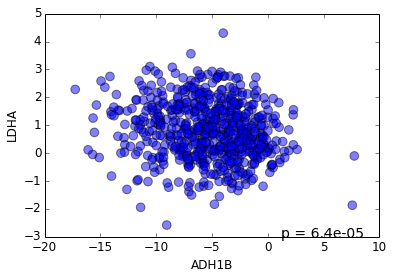

In [7]:
series_scatter(dx.ix['ADH1B'], dx.ix['LDHA'])

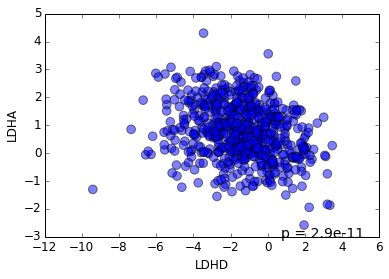

In [8]:
series_scatter(dx.ix['LDHD'], dx.ix['LDHA'])

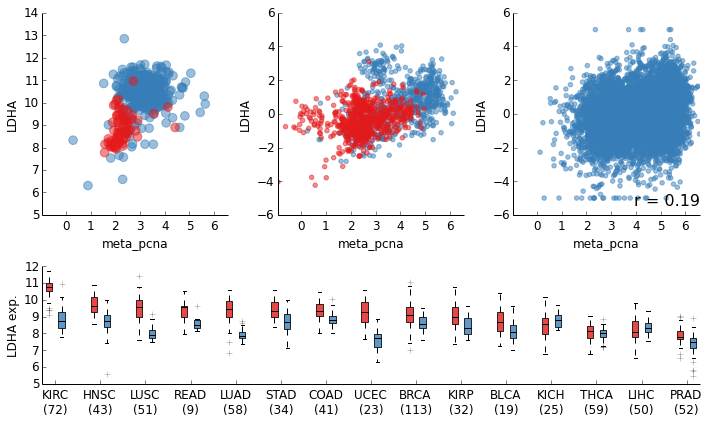

In [142]:
switch_plot('LDHA')

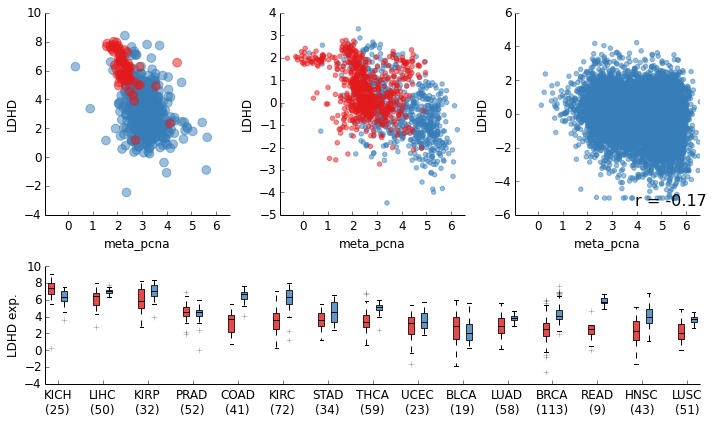

In [141]:
switch_plot('LDHD')

In [189]:
pid = 'hsa00061'
mapping = pull_pathway_info_from_kegg(pid)
plot_data_on_pathway(pid, mapping, f_win + .5)

http://www.kegg.jp/kegg-bin/show_pathway?map=hsa00061&multi_query=hsa:31+%23FAE8DE%0D%hsa:32+%236EAED2%0D%hsa:23205+%23C2DDEC%0D%hsa:23305+%23D4E6F1%0D%hsa:2194+%23FCD7C2%0D%hsa:27349+%23FDDDCB%0D%hsa:55301+%23D5E7F1%0D%hsa:54995+%23F9F0EB


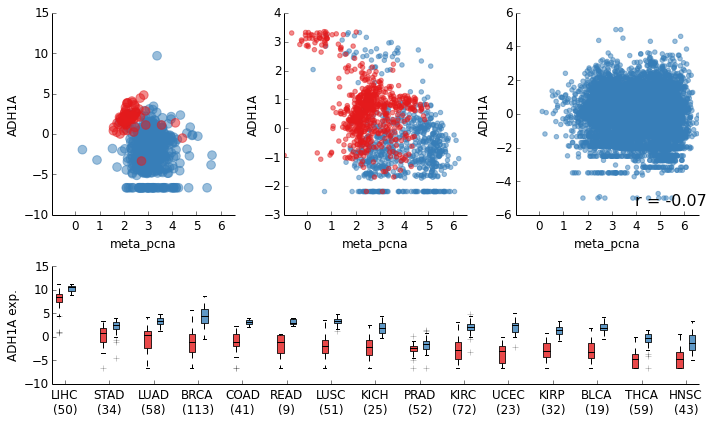

In [3]:
switch_plot('ADH1A')

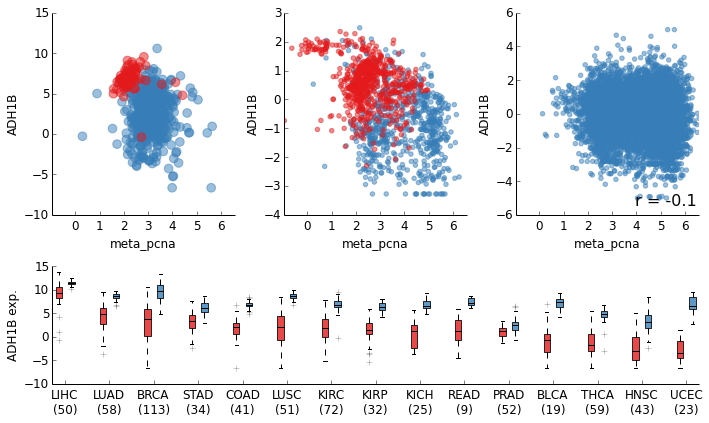

In [4]:
switch_plot('ADH1B')

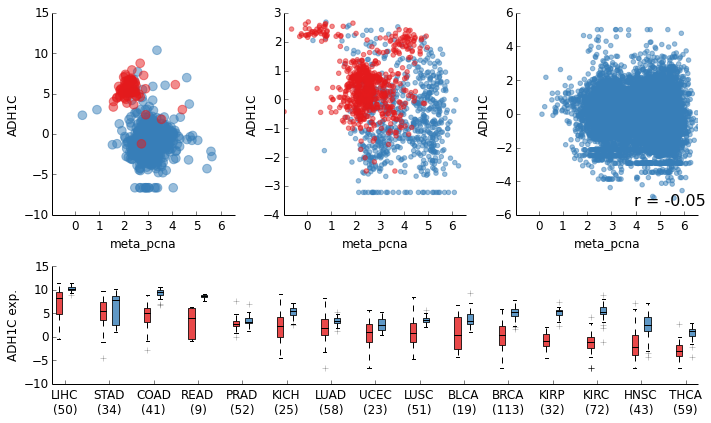

In [5]:
switch_plot('ADH1C')

ADH = Alchohol dehydrogenase

In [9]:
adh = [g for g in rna_df.index if g.startswith('ADH') and g != 'ADHFE1']
f = dx_rna.ix[adh].dropna()
f.join(f_win).sort(f_win.name).sort('frac')

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
ADH1B,38,684,0.06,9.59e-144,-0.32
ADH1A,44,684,0.06,1.35e-136,-0.32
ADH1C,87,684,0.13,2.03e-94,-0.33
ADH5,193,684,0.28,7.70e-31,-0.22
ADH7,171,596,0.29,6.39e-26,-0.21
ADH4,196,682,0.29,2.53e-29,-0.15
ADH6,202,684,0.30,2.65e-27,-0.17


ALDH = aldehyde dehydrogenase

In [10]:
aldh = [g for g in rna_df.index if g.startswith('ALDH')]
f = dx_rna.ix[aldh].dropna()
f.join(f_win).sort(f_win.name).sort('frac')

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
ALDH2,102,684,0.15,1.69e-82,-2.12e-01
ALDH1A2,112,684,0.16,3.47e-75,-2.34e-01
ALDH6A1,178,684,0.26,2.68e-37,-2.03e-01
ALDH1A1,190,684,0.28,4.48e-32,-1.04e-01
ALDH9A1,194,684,0.28,1.96e-30,-2.35e-01
ALDH1L1,203,684,0.30,6.32e-27,-1.13e-01
ALDH7A1,206,684,0.30,8.24e-26,-1.52e-01
ALDH8A1,211,684,0.31,5.18e-24,-1.64e-01
ALDH3A2,217,684,0.32,5.97e-22,-1.45e-01
ALDH4A1,261,684,0.38,6.24e-10,-1.18e-01


The top hit came from fatty acid metabolism, of which the ADH genes are a subset.  It does seem that there is a significnat contribution of the other members of the pathway as well though. 

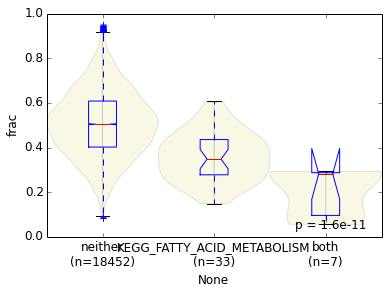

In [11]:
aa = pd.Series(1, adh).ix[rna_df.index].fillna(0)
cc = combine(aa, gene_sets['KEGG_FATTY_ACID_METABOLISM']).order()
violin_plot_pandas(cc, dx_rna.frac)

ALDH2 is the main enzyme to break down acetylaldehide, the major byproduct of alcohol. Acetylaldehide is a well established carcinogen. 

In [12]:
dx_rna.ix[ti(gene_sets['KEGG_FATTY_ACID_METABOLISM']>0)].sort('p').head(5)

,num_ox,num_dx,frac,p
ADH1B,38,684,0.06,9.59e-144
ADH1A,44,684,0.06,1.35e-136
ADH1C,87,684,0.13,2.03e-94
ALDH2,102,684,0.15,1.69e-82
ACAT1,135,684,0.20,4.57e-60


In [13]:
(dx.ix[adh].sum() > 0).mean()

0.083204930662557783

In [14]:
(dx.ix[aldh].sum() > 0).mean()

0.21879815100154082

In [15]:
anova(pd.Series(1, aldh).ix[rna_df.index].fillna(0), f_win)

F    7.91e+00
p    4.93e-03
dtype: float64

In [16]:
anova(pd.Series(1, adh).ix[rna_df.index].fillna(0), f_win)

F    3.04e+01
p    3.58e-08
dtype: float64

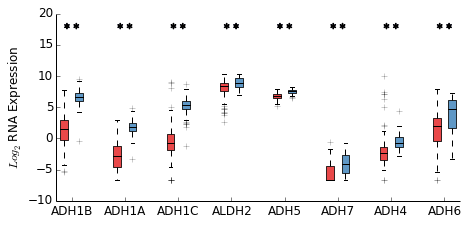

In [18]:
f = dx_rna.ix[adh + ['ALDH2']].dropna().sort('frac').index
paired_boxplot_tumor_normal(matched_rna.ix[adh + ['ALDH2']].ix[:, ti(codes.str.startswith('K'))].T, 
                            order=list(f))
plt.gca().get_legend().set_visible(False)
prettify_ax(plt.gca())

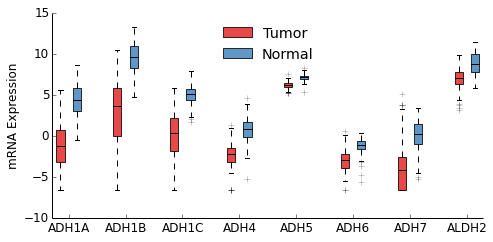

In [34]:
fig, ax = subplots(figsize=(7,3.5))
f = dx_rna.ix[adh + ['ALDH2']].dropna().sort('frac').index
paired_boxplot_tumor_normal(matched_rna.ix[adh + ['ALDH2']].ix[:, ti(codes.str.startswith('BRCA'))].T, 
                            order=sorted(f), sig=False, ax=ax)
ax.legend_.set_frame_on(False)
ax.set_ylabel('mRNA Expression')
#plt.gca().get_legend().set_visible(False)
prettify_ax(ax)
fig.tight_layout()
fig.savefig(FIGDIR + 'tn.pdf')

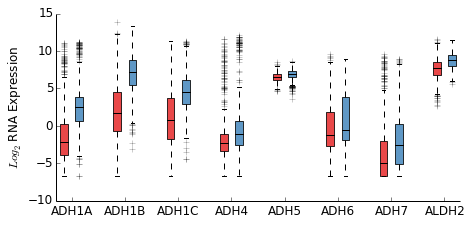

In [17]:
f = dx_rna.ix[adh + ['ALDH2']].dropna().sort('frac').index
paired_boxplot_tumor_normal(matched_rna.ix[adh + ['ALDH2']].T, 
                            order=sorted(f), sig=False)
plt.gca().get_legend().set_visible(False)
prettify_ax(plt.gca())

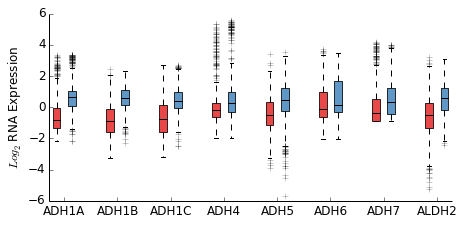

In [18]:
f = dx_rna.ix[adh + ['ALDH2']].dropna().sort('frac').index
paired_boxplot_tumor_normal(df_s3.ix[adh + ['ALDH2']].T, 
                            order=sorted(f), sig=False)
plt.gca().get_legend().set_visible(False)
prettify_ax(plt.gca())

In [19]:
def paired_bp_tn_split(vec, assignment, ax=None, split_vals=('01', '11'),
                       order=None,
                       data_type='gene expression'):
    """
    Paired boxplot for a single Series, with splitting on the index,
    grouped by assignment. I.E. Tumor-Normal gene expression split by
    cancer.
    
    vec: 
        vector of values to plot.
    assignment: 
        vector mapping keys to group assignment
    ax (None):
        matplotlib axis to plot on or None
    split_vals ('01','11'):
        Values to split the boxplot pairing on. The default of 
        ('01','11') indicates tumor vs. normal in the standard 
        TCGA barcode nomenclature.  This should coorespond to values
        on the second level of the index for vec and assignment.
        
    **both vec and assignment should have an overlapping index with
    multiple levels**
    """
    _, ax = init_ax(ax, figsize=(8, 3))
    if vec.name != None:
        label = vec.name  # lose label in manipulation
    else:
        label = ''
    g1 = split_vals[0]
    g2 = split_vals[1]
    vec = pd.concat([vec[:, g1], vec[:, g2]], keys=[g1, g2],
                    axis=1)
    vec = vec.dropna().stack()

    counts = vec.unstack().groupby(assignment).size()
    groups = list(true_index(counts > 5))
    groups = vec.unstack().groupby(assignment).median()[g1].ix[groups]
    groups = groups.order().index[::-1]
    if order is not None: 
        groups = [g for g in order if g in groups]

    l1 = [np.array(vec[:, g1].ix[true_index(assignment == c)].dropna())
          for c in groups]
    l2 = [np.array(vec[:, g2].ix[true_index(assignment == c)].dropna())
          for c in groups]
    boxes = [x for t in zip(l1, l2) for x in t if len(t[1]) > 5]

    ax, bp = paired_boxplot(boxes, ax)
    labels = ['{}\n({})'.format(c, counts[c]) for c in groups]
    ax.set_xticklabels(labels)
    prettify_ax(ax)
    ax.set_ylabel('{} {}'.format(label, data_type))

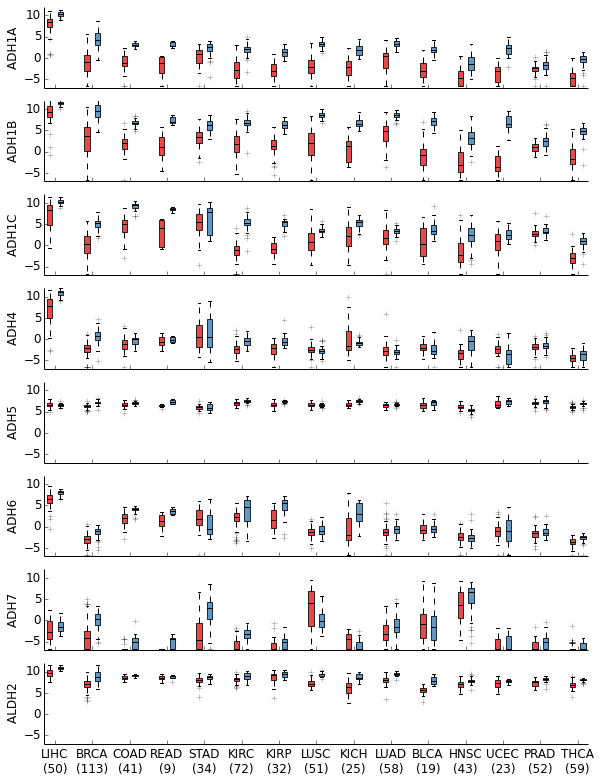

In [21]:
fig, axs = subplots(8, 1, figsize=(8.5,11), sharex=True)
letters = list(map(chr, range(97, 123)))
o = rna_df.ix[f].sum()[:,'11'].groupby(codes).mean().order().index[::-1]
for i,g in enumerate(sorted(f)):
    paired_bp_tn_split(matched_rna.ix[g], codes, ax=axs[i], data_type='',
                       order=o)
    axs[i].set_ybound(-7,12)
    #axs[i].text(-0.05, 1.15, letters[i], transform=axs[i].transAxes,
    #        fontsize=18, fontweight='bold', va='top', ha='right')
fig.tight_layout()
fig.savefig(FIGDIR + 'Fig_S4.pdf')

In [19]:
rr = df_s.corrwith(df_s.ix[['ADH1A','ADH1B','ADH1C']].mean(), 1).dropna()
enr = screen_feature(rr.order(), rev_kruskal, gene_sets.T, align=False)
fp = (1.*gene_sets.T * rr).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'fc'
enr.head(4)

,H,p,q
REACTOME_CELL_CYCLE,373.76,2.84e-83,3.78e-80
REACTOME_CELL_CYCLE_MITOTIC,325.14,1.10e-72,7.33e-70
REACTOME_METABOLISM_OF_RNA,295.80,2.71e-66,1.20e-63
REACTOME_DNA_REPLICATION,289.31,7.04e-65,2.34e-62


In [20]:
enr.ix[ti(fp > 0)].join(fp).sort('p').head()

,H,p,q,fc
Gene_Set,,,,
NABA_MATRISOME,239.37,5.39e-54,1.19e-51,0.11
REACTOME_METABOLISM_OF_PROTEINS,177.90,1.39e-40,1.54e-38,0.00
NABA_CORE_MATRISOME,146.90,8.25e-34,4.99e-32,0.14
NABA_ECM_GLYCOPROTEINS,113.07,2.08e-26,8.13e-25,0.14
NABA_MATRISOME_ASSOCIATED,111.37,4.91e-26,1.87e-24,0.10


In [22]:
#corr_profile_t = df_s.T.corr()
#corr_profile_t.to_hdf(STORE, 'dfs_correlations')

#corr_profile_m = dx.T.corr()
#corr_profile_m.to_hdf(STORE, 'dx_correlations')

corr_profile_t = pd.read_hdf(STORE, 'dfs_correlations')
corr_profile_m = pd.read_hdf(STORE, 'dx_correlations')
corr_change = corr_profile_m - corr_profile_t

In [84]:
f_win.order()

PIK3C2G        -0.39
LOC100289255   -0.38
SFRP1          -0.36
PKHD1L1        -0.36
TCEAL2         -0.36
SCNN1B         -0.35
GPM6B          -0.35
NRXN1          -0.34
TPPP2          -0.34
USP44          -0.33
ADH1C          -0.33
DDX25          -0.33
CNTFR          -0.33
SCNN1G         -0.33
ANK2           -0.33
...
CD276        0.38
CDKN2A       0.38
ADAM18       0.38
IBSP         0.39
MPG          0.39
PTP4A3       0.39
BBC3         0.40
LOC283914    0.41
LOC221122    0.41
LINC00460    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.46
SEMA5B       0.48
MIR4508      0.52
Name: fraction overexpressed
(detrended), Length: 20784, dtype: float64

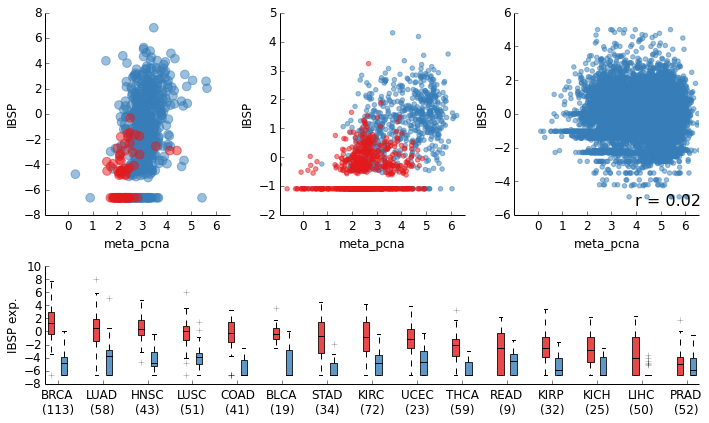

In [98]:
switch_plot('IBSP')

In [86]:
rr = screen_feature(corr_change.ix['IBSP'], rev_kruskal, gene_sets.T)
rr.head(3)

,H,p,q
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,63.35,1.73e-15,1.96e-12
KEGG_FOCAL_ADHESION,62.30,2.95e-15,1.96e-12
REACTOME_DEVELOPMENTAL_BIOLOGY,57.38,3.59e-14,1.59e-11


In [90]:
len(rr[rr.q < 10e-8].index)

14

In [99]:
tstats = {}
for gs in rr[rr.q < 10e-8].index:
    mm = corr_change.groupby(gene_sets[gs]).mean()
    vv = corr_change.groupby(gene_sets[gs]).var()
    tt = ((mm.ix[1] - mm.ix[0]) / 
          np.sqrt(vv.div(gene_sets[gs].value_counts(), axis=0)).sum())
    tt = tt.dropna().order()
    tstats[gs] = tt
tstats = pd.DataFrame(tstats)

In [105]:
tstats.rank(ascending=True).ix['CST2'].order()

BIOCARTA_TCR_PATHWAY                                      2
KEGG_NEUROTROPHIN_SIGNALING_PATHWAY                       3
REACTOME_DEVELOPMENTAL_BIOLOGY                          137
PID_PDGFRB_PATHWAY                                      143
KEGG_MAPK_SIGNALING_PATHWAY                             166
KEGG_PATHWAYS_IN_CANCER                                 383
PID_CXCR4_PATHWAY                                       401
REACTOME_ADAPTIVE_IMMUNE_SYSTEM                         550
PID_FAK_PATHWAY                                         702
KEGG_FOCAL_ADHESION                                     876
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY                 1158
REACTOME_IMMUNE_SYSTEM                                 2026
PID_TCR_PATHWAY                                        3077
REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES    20393
Name: CST2, dtype: float64

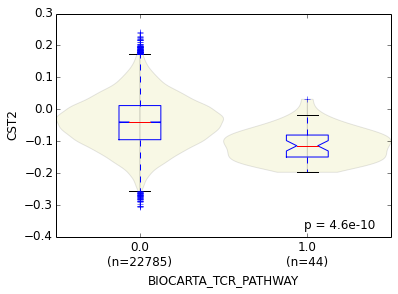

In [106]:
violin_plot_pandas(gene_sets['BIOCARTA_TCR_PATHWAY'], 
                   corr_change.ix['CST2'].dropna())

    %%time
    gene_set_t = {}
    for gs in gene_sets.columns:
        mm = corr_profile.groupby(gene_sets[gs]).mean()
        vv = corr_profile.groupby(gene_sets[gs]).var()
        tt = ((mm.ix[1] - mm.ix[0]) / 
              np.sqrt(vv.div(gene_sets[gs].value_counts(), axis=0)).sum())
        tt = tt.dropna().order()
        gene_set_t[gs] = tt
    gene_set_t = pd.DataFrame(gene_set_t)

In [60]:
gene_set_t = pd.read_hdf(STORE, 'gene_set_t_on_dx_corr')

In [36]:
gs = 'REACTOME_EXTENSION_OF_TELOMERES'
mm = corr_change.groupby(gene_sets[gs]).mean()
vv = corr_change.groupby(gene_sets[gs]).var()
tt = ((mm.ix[1] - mm.ix[0]) / 
      np.sqrt(vv.div(gene_sets[gs].value_counts(), axis=0)).sum())
tt = tt.dropna().order()

In [67]:
dx_rna.frac.order()

ADH1B        0.06
ADH1A        0.06
SCARA5       0.08
GSTM5        0.08
TMEM132C     0.08
LOC572558    0.08
TCEAL2       0.09
MAMDC2       0.09
CD300LG      0.09
FAM107A      0.09
CMTM5        0.09
CHRDL1       0.09
C1QTNF7      0.09
MYZAP        0.10
PI16         0.10
...
BUB1      0.94
TROAP     0.94
UHRF1     0.94
CDC45     0.94
TOP2A     0.94
KIF4A     0.94
SEMA5B    0.94
SPC24     0.94
MELK      0.94
CDT1      0.95
TPX2      0.95
ASF1B     0.95
PKMYT1    0.95
UBE2C     0.95
IQGAP3    0.95
Name: frac, Length: 20833, dtype: float64

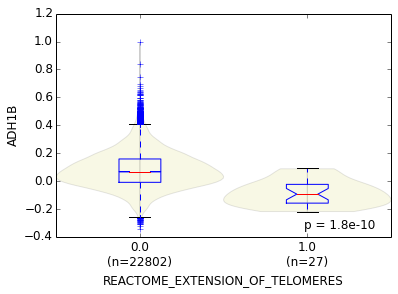

In [41]:
violin_plot_pandas(gene_sets['REACTOME_EXTENSION_OF_TELOMERES'],
                   corr_profile_m.ix['ADH1B'].dropna())

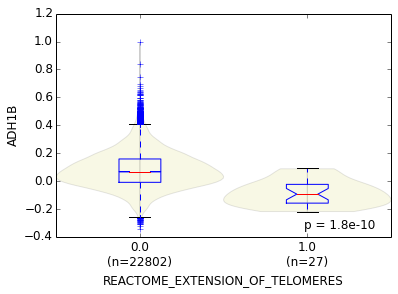

In [131]:
violin_plot_pandas(gene_sets['REACTOME_EXTENSION_OF_TELOMERES'],
                   corr_profile.ix['ADH1B'].dropna())

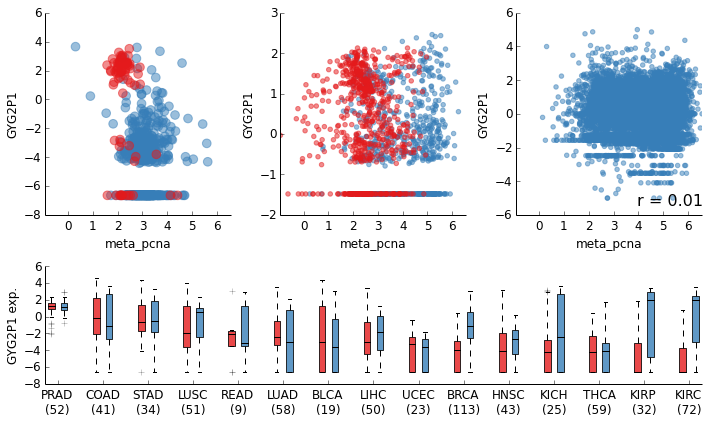

In [93]:
switch_plot('GYG2P1')

In [593]:
v = gene_set_t['REACTOME_EXTENSION_OF_TELOMERES'].order()
v = v[v > 10]
dx_rna.join(v).join(f_win).sort(f_win.name).dropna().tail(20)

,num_ox,num_dx,frac,p,REACTOME_EXTENSION_OF_TELOMERES,fraction overexpressed (detrended)
NME2,519,684,0.76,1.72e-43,10.00,0.23
PDCD5,579,684,0.85,2.96e-80,10.56,0.23
GAPDH,613,684,0.90,1.49e-108,10.40,0.24
CNPY2,574,684,0.84,1.31e-76,11.23,0.24
PYCR1,595,684,0.87,9.28e-93,11.18,0.24
OR1F1,239,307,0.78,1.86e-23,10.30,0.24
PAQR4,635,684,0.93,6.31e-131,11.55,0.25
POP7,620,684,0.91,2.90e-115,12.25,0.25
CAMK2N2,597,684,0.87,2.03e-94,10.85,0.25
LAGE3,609,684,0.89,7.22e-105,11.92,0.25


In [ ]:
vv = gene_set_t.corrwith(dx_rna.frac)

In [574]:
vv.order().tail(40)

REACTOME_P53_DEPENDENT_G1_DNA_DAMAGE_RESPONSE                   0.61
REACTOME_CELL_CYCLE_MITOTIC                                     0.62
REACTOME_EARLY_PHASE_OF_HIV_LIFE_CYCLE                          0.62
REACTOME_ACTIVATION_OF_THE_PRE_REPLICATIVE_COMPLEX              0.62
REACTOME_REGULATION_OF_MITOTIC_CELL_CYCLE                       0.62
REACTOME_APC_C_CDH1_MEDIATED_DEGRADATION_OF_CDC20_AND_OTHER_APC_C_CDH1_TARGETED_PROTEINS_IN_LATE_MITOSIS_EARLY_G1    0.62
BIOCARTA_SRCRPTP_PATHWAY                                        0.62
REACTOME_ORC1_REMOVAL_FROM_CHROMATIN                            0.63
KEGG_BASE_EXCISION_REPAIR                                       0.63
REACTOME_CELL_CYCLE                                             0.63
REACTOME_ASSOCIATION_OF_LICENSING_FACTORS_WITH_THE_PRE_REPLICATIVE_COMPLEX    0.63
REACTOME_BASE_EXCISION_REPAIR                                   0.63
REACTOME_HOST_INTERACTIONS_OF_HIV_FACTORS                       0.63
REACTOME_MITOTIC_M_M_G1_PHASES      